In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/10_Oct.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.500000,70.000000,1,1,0,2778.0,2744.0,2782.0,3085.0,3280.0,3160.0,2752.083333,2701.0
1,26.333333,70.500000,1,1,0,2747.0,2758.0,2777.0,3063.0,3255.0,3181.0,2745.083333,2693.0
2,26.166667,71.000000,1,1,0,2743.0,2765.0,2779.0,3061.0,3281.0,3223.0,2736.500000,2676.0
3,26.000000,71.500000,1,1,0,2705.0,2765.0,2763.0,3033.0,3257.0,3226.0,2728.250000,2664.0
4,25.833333,72.000000,2,1,0,2701.0,2778.0,2744.0,3045.0,3241.0,3191.0,2722.000000,2669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,21.622452,82.539116,23,5,1,2176.0,2229.0,2304.0,2158.0,1800.0,2184.0,2193.916667,2138.0
8924,21.622452,82.539116,24,5,1,2143.0,2206.0,2275.0,2140.0,1795.0,2166.0,2180.500000,2114.0
8925,21.622452,82.539116,24,5,1,2153.0,2189.0,2257.0,2108.0,1775.0,2152.0,2165.916667,2082.0
8926,21.400000,82.539116,24,5,1,2141.0,2183.0,2237.0,2111.0,1772.0,2146.0,2153.416667,2087.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,2.276463,1.799929,0.710560
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,2.196030,1.867971,0.688968
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,2.279680,2.004053,0.662493
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,2.202465,2.013774,0.637046
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,2.150988,1.900371,0.617767


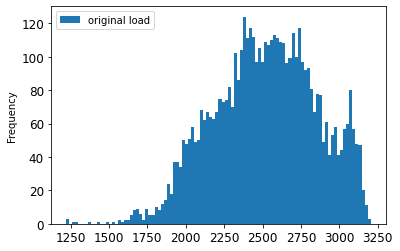

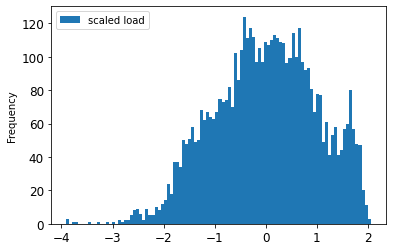

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

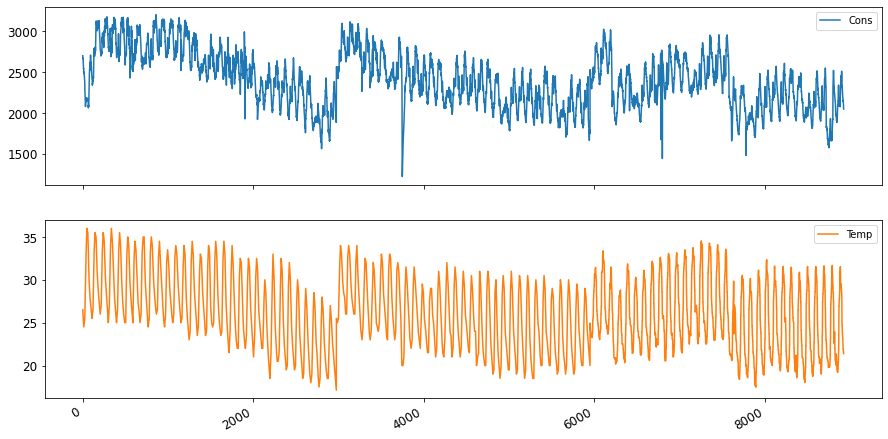

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,2.276463,1.799929,0.710560,0.520183
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,2.196030,1.867971,0.688968,0.469032
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,2.279680,2.004053,0.662493,0.432926
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,2.202465,2.013774,0.637046,0.447970
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,2.150988,1.900371,0.617767,0.378766
5,0.378766,-0.287235,0.995123,-1.516262,-1.437624,-1.570784,0.517734,0.678396,0.709695,1.456271,2.006210,1.777249,0.588979,0.342659
6,0.342659,-0.326992,1.030902,-1.516262,-1.437624,-1.570784,0.466466,0.666312,0.730881,1.399418,1.970820,1.790209,0.555306,0.273455
7,0.273455,-0.366750,1.066682,-1.516262,-1.437624,-1.570784,0.430276,0.551518,0.730881,1.342564,1.858215,1.693007,0.515721,0.201241
8,0.201241,-0.406508,1.102462,-1.371824,-1.437624,-1.570784,0.445355,0.539435,0.770228,1.241492,1.803521,1.615246,0.466626,0.068850
9,0.068850,-0.446266,1.138241,-1.371824,-1.437624,-1.570784,0.375992,0.515267,0.676402,1.105675,1.700567,1.453243,0.414189,0.080886


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-1.748518,-1.498039,0.822730,1.372490,-1.437624,-1.570784,-1.536019,-1.315398,-1.278810,-1.427463,-1.220734,-0.954124,-1.501295,-1.766571
4984,-1.766571,-1.530568,0.848752,1.516927,-1.437624,-1.570784,-1.617445,-1.288210,-1.293944,-1.449573,-1.281863,-1.077246,-1.543193,-1.634180
4985,-1.634180,-1.563097,0.874773,1.516927,-1.437624,-1.570784,-1.644587,-1.415088,-1.312103,-1.260061,-1.249690,-1.044846,-1.572239,-1.393469
4986,-1.393469,-1.595626,0.900795,1.516927,-1.437624,-1.570784,-1.716966,-1.508736,-1.251571,-1.190574,-1.034131,-0.902283,-1.585862,-1.387451
4987,-1.387451,-1.628156,0.926816,1.516927,-1.437624,-1.570784,-1.756172,-1.541966,-1.321183,-1.203208,-1.011610,-0.882842,-1.593059,-1.435593
4988,-1.435593,-1.660685,0.952838,1.661365,-1.437624,-1.570784,-1.774266,-1.623530,-1.293944,-1.225317,-0.985872,-0.924963,-1.606683,-1.531878
4989,-1.531878,-1.693214,0.978859,1.661365,-1.437624,-1.570784,-1.641572,-1.650718,-1.421063,-1.291646,-1.072739,-0.934683,-1.617735,-1.697366
4990,-1.697366,-1.725743,1.004881,1.661365,-1.437624,-1.570784,-1.400308,-1.723220,-1.514889,-1.436939,-1.211083,-1.054566,-1.634957,-1.703384
4991,-1.703384,-1.758272,1.030902,1.661365,-1.437624,-1.570784,-1.394277,-1.762491,-1.548182,-1.487475,-1.301167,-1.142047,-1.649866,-1.805686
4992,-1.805686,-1.758272,1.030902,-1.660699,-0.939182,0.636625,-1.442529,-1.780617,-1.629901,-1.563280,-1.478118,-1.197129,-1.666574,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-1.748518,-1.498039,0.822730,1.372490,-1.437624,-1.570784,-1.536019,-1.315398,-1.278810,-1.427463,-1.220734,-0.954124,-1.501295,-1.766571
4984,-1.766571,-1.530568,0.848752,1.516927,-1.437624,-1.570784,-1.617445,-1.288210,-1.293944,-1.449573,-1.281863,-1.077246,-1.543193,-1.634180
4985,-1.634180,-1.563097,0.874773,1.516927,-1.437624,-1.570784,-1.644587,-1.415088,-1.312103,-1.260061,-1.249690,-1.044846,-1.572239,-1.393469
4986,-1.393469,-1.595626,0.900795,1.516927,-1.437624,-1.570784,-1.716966,-1.508736,-1.251571,-1.190574,-1.034131,-0.902283,-1.585862,-1.387451
4987,-1.387451,-1.628156,0.926816,1.516927,-1.437624,-1.570784,-1.756172,-1.541966,-1.321183,-1.203208,-1.011610,-0.882842,-1.593059,-1.435593
4988,-1.435593,-1.660685,0.952838,1.661365,-1.437624,-1.570784,-1.774266,-1.623530,-1.293944,-1.225317,-0.985872,-0.924963,-1.606683,-1.531878
4989,-1.531878,-1.693214,0.978859,1.661365,-1.437624,-1.570784,-1.641572,-1.650718,-1.421063,-1.291646,-1.072739,-0.934683,-1.617735,-1.697366
4990,-1.697366,-1.725743,1.004881,1.661365,-1.437624,-1.570784,-1.400308,-1.723220,-1.514889,-1.436939,-1.211083,-1.054566,-1.634957,-1.703384
4991,-1.703384,-1.758272,1.030902,1.661365,-1.437624,-1.570784,-1.394277,-1.762491,-1.548182,-1.487475,-1.301167,-1.142047,-1.649866,-1.805686
4992,-1.805686,-1.758272,1.030902,-1.660699,-0.939182,0.636625,-1.442529,-1.780617,-1.629901,-1.563280,-1.478118,-1.197129,-1.666574,-1.805686


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,0.520183
1,0.469032
2,0.432926
3,0.447970
4,0.378766
...,...
4988,-1.531878
4989,-1.697366
4990,-1.703384
4991,-1.805686


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,2.276463,1.799929,0.710560
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,2.196030,1.867971,0.688968
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,2.279680,2.004053,0.662493
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,2.202465,2.013774,0.637046
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,2.150988,1.900371,0.617767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,-1.435593,-1.660685,0.952838,1.661365,-1.437624,-1.570784,-1.774266,-1.623530,-1.293944,-1.225317,-0.985872,-0.924963,-1.606683
4989,-1.531878,-1.693214,0.978859,1.661365,-1.437624,-1.570784,-1.641572,-1.650718,-1.421063,-1.291646,-1.072739,-0.934683,-1.617735
4990,-1.697366,-1.725743,1.004881,1.661365,-1.437624,-1.570784,-1.400308,-1.723220,-1.514889,-1.436939,-1.211083,-1.054566,-1.634957
4991,-1.703384,-1.758272,1.030902,1.661365,-1.437624,-1.570784,-1.394277,-1.762491,-1.548182,-1.487475,-1.301167,-1.142047,-1.649866


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1884.0,19.500000,73.333333,1.0,2.0,1.0,2011.0,1977.0,1976.0,2026.0,2109.0,2168.0,1973.750000
4994,1913.0,19.500000,73.666667,1.0,2.0,1.0,1956.0,2057.0,1952.0,2033.0,2113.0,2181.0,1970.500000
4995,1898.0,19.500000,74.000000,1.0,2.0,1.0,1954.0,2059.0,1939.0,2023.0,2090.0,2170.0,1967.083333
4996,1871.0,19.500000,74.333333,2.0,2.0,1.0,1920.0,2043.0,1933.0,1994.0,2058.0,2156.0,1961.916667
4997,1865.0,19.500000,74.666667,2.0,2.0,1.0,1884.0,2011.0,1977.0,1988.0,2080.0,2132.0,1952.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,1745.0,20.260870,73.250000,24.0,4.0,1.0,1764.0,1739.0,1819.0,2036.0,2075.0,1960.0,1752.166667
5950,1748.0,20.130435,73.166667,24.0,4.0,1.0,1794.0,1727.0,1810.0,2003.0,2027.0,1929.0,1747.000000
5951,1755.0,20.000000,73.083333,24.0,4.0,1.0,1753.0,1664.0,1798.0,1979.0,2002.0,1892.0,1743.416667
5952,2530.0,24.952452,89.775314,1.0,3.0,1.0,2649.0,2681.0,2691.0,2280.0,2514.0,3284.0,2639.333333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.94981,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,-0.131041,0.025501,-0.815821
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.94981,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,-0.110425,0.088777,-0.833214
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.94981,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,-0.228969,0.035236,-0.851498
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.94981,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,-0.393900,-0.032906,-0.879148
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.94981,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,-0.280510,-0.149722,-0.929097
4998,-1.234529,-1.224886,0.900541,-1.513750,-0.94981,0.499675,-1.072172,-0.867087,-0.362255,-0.756377,-0.311435,-0.154589,-1.008479
4999,-1.279764,-1.224886,0.924583,-1.513750,-0.94981,0.499675,-1.147790,-0.877229,-0.352043,-0.761641,-0.409363,-0.076712,-1.092767
5000,-1.365207,-1.224886,0.948625,-1.369419,-0.94981,0.499675,-1.283902,-1.049648,-0.433737,-0.898491,-0.543370,-0.193528,-1.177501
5001,-1.541119,-1.224886,0.972666,-1.369419,-0.94981,0.499675,-1.314150,-1.232209,-0.597124,-1.040604,-0.734072,-0.174058,-1.263573
5002,-1.551172,-1.224886,0.996708,-1.369419,-0.94981,0.499675,-1.243573,-1.085146,-0.877945,-0.951126,-0.764996,-0.436893,-1.326008


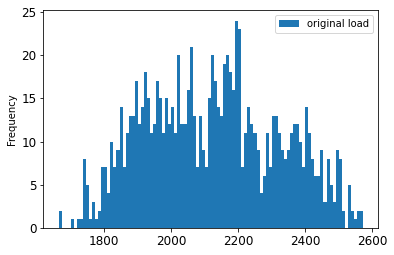

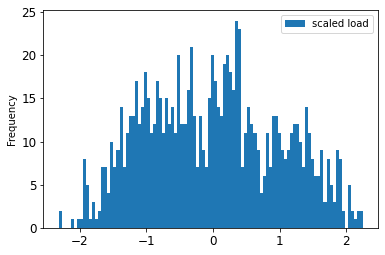

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.94981,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,-0.131041,0.025501,-0.815821,-1.063643
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.94981,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,-0.110425,0.088777,-0.833214,-1.139034
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.94981,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,-0.228969,0.035236,-0.851498,-1.274738
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.94981,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,-0.393900,-0.032906,-0.879148,-1.304894
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.94981,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,-0.280510,-0.149722,-0.929097,-1.234529
4998,-1.234529,-1.224886,0.900541,-1.513750,-0.94981,0.499675,-1.072172,-0.867087,-0.362255,-0.756377,-0.311435,-0.154589,-1.008479,-1.279764
4999,-1.279764,-1.224886,0.924583,-1.513750,-0.94981,0.499675,-1.147790,-0.877229,-0.352043,-0.761641,-0.409363,-0.076712,-1.092767,-1.365207
5000,-1.365207,-1.224886,0.948625,-1.369419,-0.94981,0.499675,-1.283902,-1.049648,-0.433737,-0.898491,-0.543370,-0.193528,-1.177501,-1.541119
5001,-1.541119,-1.224886,0.972666,-1.369419,-0.94981,0.499675,-1.314150,-1.232209,-0.597124,-1.040604,-0.734072,-0.174058,-1.263573,-1.551172
5002,-1.551172,-1.224886,0.996708,-1.369419,-0.94981,0.499675,-1.243573,-1.085146,-0.877945,-0.951126,-0.764996,-0.436893,-1.326008,-1.596406


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5944,-2.269899,-0.844038,0.804375,1.517204,0.167408,0.499675,-1.818270,-1.409699,-1.061756,-0.630054,-0.548524,-1.293540,-1.794721,-1.812527
5945,-1.812527,-0.879193,0.798365,1.517204,0.167408,0.499675,-1.949341,-1.561834,-1.265990,-0.266876,-0.105270,-1.259469,-1.846453,-1.661745
5946,-1.661745,-0.914348,0.792354,1.517204,0.167408,0.499675,-2.009836,-1.607474,-1.163873,-0.014229,-0.033113,-0.909022,-1.893726,-1.867814
5947,-1.867814,-0.949504,0.786344,1.517204,0.167408,0.499675,-2.327432,-1.668328,-1.337472,-0.177397,-0.058883,-0.826278,-1.944120,-1.661745
5948,-1.661745,-0.984659,0.780334,1.661535,0.167408,0.499675,-2.282061,-1.835676,-1.424271,-0.372145,-0.115579,-0.860349,-1.968649,-1.908022
5949,-1.908022,-1.019814,0.774323,1.661535,0.167408,0.499675,-1.823311,-1.967526,-1.577447,-0.456360,-0.306281,-0.986899,-2.001650,-1.892944
5950,-1.892944,-1.054969,0.768313,1.661535,0.167408,0.499675,-1.672075,-2.028379,-1.623399,-0.630054,-0.553678,-1.137786,-2.029300,-1.857762
5951,-1.857762,-1.090124,0.762303,1.661535,0.167408,0.499675,-1.878765,-2.347862,-1.684669,-0.756377,-0.682531,-1.317877,-2.048477,2.037440
5952,2.037440,0.244674,1.966206,-1.658081,-0.391201,0.499675,2.638156,2.809494,2.874853,0.827924,1.956373,5.457421,2.746128,1.876605
5953,1.876605,0.244674,1.966206,-1.658081,-0.391201,0.499675,2.365931,2.718213,2.793159,0.727919,1.739901,5.389279,2.667191,1.876605


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4993,-1.063643
4994,-1.139034
4995,-1.274738
4996,-1.304894
4997,-1.234529
...,...
5949,-1.892944
5950,-1.857762
5951,2.037440
5952,1.876605


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.949810,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,-0.131041,0.025501,-0.815821
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.949810,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,-0.110425,0.088777,-0.833214
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.949810,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,-0.228969,0.035236,-0.851498
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.949810,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,-0.393900,-0.032906,-0.879148
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.949810,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,-0.280510,-0.149722,-0.929097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,-1.908022,-1.019814,0.774323,1.661535,0.167408,0.499675,-1.823311,-1.967526,-1.577447,-0.456360,-0.306281,-0.986899,-2.001650
5950,-1.892944,-1.054969,0.768313,1.661535,0.167408,0.499675,-1.672075,-2.028379,-1.623399,-0.630054,-0.553678,-1.137786,-2.029300
5951,-1.857762,-1.090124,0.762303,1.661535,0.167408,0.499675,-1.878765,-2.347862,-1.684669,-0.756377,-0.682531,-1.317877,-2.048477
5952,2.037440,0.244674,1.966206,-1.658081,-0.391201,0.499675,2.638156,2.809494,2.874853,0.827924,1.956373,5.457421,2.746128


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.3))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 5s 13ms/step - loss: 0.1344 - val_loss: 0.1759
Epoch 2/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0870 - val_loss: 0.2308
Epoch 3/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0750 - val_loss: 0.1138
Epoch 4/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0536 - val_loss: 0.0840
Epoch 5/300
417/417 [==============================] - 5s 12ms/step - loss: 0.0517 - val_loss: 0.0808
Epoch 6/300
417/417 [==============================] - 5s 13ms/step - loss: 0.0436 - val_loss: 0.0870
Epoch 7/300
417/417 [==============================] - 5s 12ms/step - loss: 0.0370 - val_loss: 0.0693
Epoch 8/300
417/417 [==============================] - 5s 12ms/step - loss: 0.0324 - val_loss: 0.0595
Epoch 9/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0334 - val_loss: 0.0560
Epoch 10/300
417/417 [==============================] - 5s 11ms/step - loss: 0.031

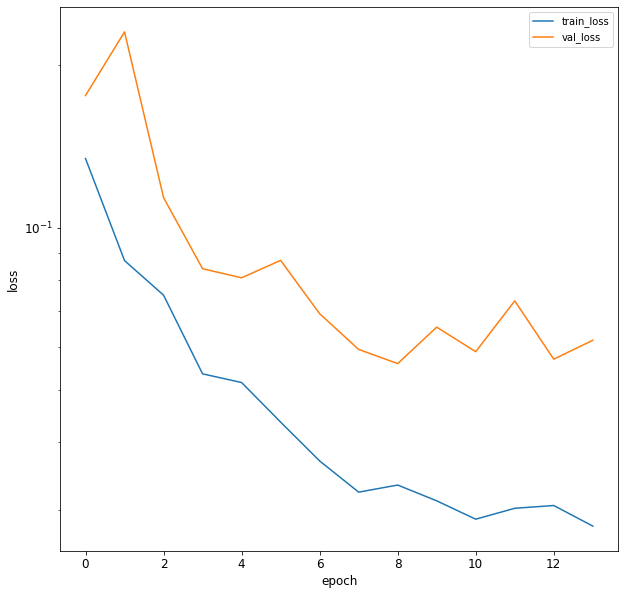

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >=5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,2486.0,24.552451,91.158517,1.0,3.0,1.0,2581.0,2682.0,2701.0,2252.0,2485.0,3246.0,2606.666667
5955,2479.0,24.152450,92.541720,1.0,3.0,1.0,2565.0,2656.0,2694.0,2238.0,2493.0,3226.0,2588.750000
5956,2497.0,24.152450,92.541720,2.0,3.0,1.0,2530.0,2649.0,2681.0,2224.0,2487.0,3198.0,2573.416667
5957,2461.0,24.152450,92.541720,2.0,3.0,1.0,2498.0,2595.0,2663.0,2190.0,2455.0,3193.0,2556.583333
5958,2450.0,24.002451,92.985790,2.0,3.0,1.0,2486.0,2581.0,2682.0,2174.0,2442.0,3161.0,2537.250000
5959,2435.0,23.852451,93.429860,2.0,3.0,1.0,2479.0,2565.0,2656.0,2144.0,2424.0,3146.0,2518.833333
5960,2417.0,23.852451,93.429860,3.0,3.0,1.0,2497.0,2530.0,2649.0,2146.0,2388.0,3126.0,2499.500000
5961,2393.0,23.852451,93.429860,3.0,3.0,1.0,2461.0,2498.0,2595.0,2131.0,2373.0,3110.0,2482.666667
5962,2373.0,23.572451,92.685175,3.0,3.0,1.0,2450.0,2486.0,2581.0,2127.0,2357.0,3089.0,2465.333333
5963,2360.0,23.292452,91.940490,3.0,3.0,1.0,2435.0,2479.0,2565.0,2128.0,2369.0,3072.0,2448.250000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


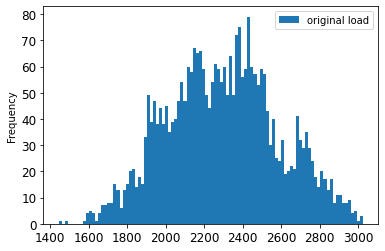

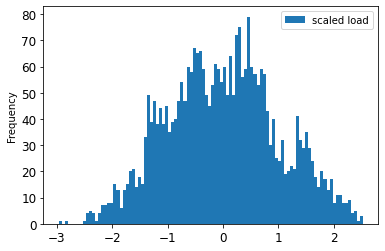

In [33]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,0.658068,-0.234648,1.447198,-1.663428,-0.521692,0.590035,0.986057,1.333729,1.395849,-0.193029,0.590068,3.096618,1.109722,0.633732
5955,0.633732,-0.329547,1.526921,-1.663428,-0.521692,0.590035,0.930440,1.243423,1.371563,-0.241113,0.618895,3.027920,1.045394,0.696309
5956,0.696309,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.808778,1.219110,1.326460,-0.289197,0.597275,2.931743,0.990341,0.571156
5957,0.571156,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.697545,1.031553,1.264011,-0.405972,0.481967,2.914568,0.929902,0.532914
5958,0.532914,-0.365134,1.552516,-1.518879,-0.521692,0.590035,0.655832,0.982927,1.329930,-0.460926,0.435123,2.804651,0.860488,0.480767
5959,0.480767,-0.400721,1.578111,-1.518879,-0.521692,0.590035,0.631499,0.927354,1.239725,-0.563963,0.370262,2.753128,0.794364,0.418190
5960,0.418190,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.694069,0.805789,1.215439,-0.557094,0.240540,2.684430,0.724950,0.334754
5961,0.334754,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.568930,0.694644,1.028090,-0.608612,0.186490,2.629472,0.664511,0.265224
5962,0.265224,-0.467150,1.535190,-1.374330,-0.521692,0.590035,0.530694,0.652965,0.979518,-0.622350,0.128836,2.557339,0.602277,0.220030
5963,0.220030,-0.533580,1.492269,-1.374330,-0.521692,0.590035,0.478553,0.628652,0.924007,-0.618916,0.172076,2.498945,0.540941,0.237413


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8923,-0.551751,-0.929783,0.950404,1.516643,0.520991,0.590035,-0.421746,-0.239670,0.018488,-0.515879,-1.878244,-0.551246,-0.372221,-0.635187
8924,-0.635187,-0.929783,0.950404,1.661192,0.520991,0.590035,-0.536456,-0.319555,-0.082125,-0.577701,-1.896261,-0.613074,-0.420392,-0.746434
8925,-0.746434,-0.929783,0.950404,1.661192,0.520991,0.590035,-0.501695,-0.378601,-0.144575,-0.687607,-1.968328,-0.661163,-0.472752,-0.729052
8926,-0.729052,-0.982559,0.950404,1.661192,0.520991,0.590035,-0.543408,-0.399441,-0.213963,-0.677304,-1.979139,-0.681772,-0.517632,-0.864635
8927,-0.864635,-0.982559,0.959676,1.661192,0.520991,0.590035,-0.553836,-0.423754,-0.241719,-0.715084,-2.040396,-0.760775,-0.571788,-0.864635


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5954,0.633732
5955,0.696309
5956,0.571156
5957,0.532914
5958,0.480767
...,...
8923,-0.635187
8924,-0.746434
8925,-0.729052
8926,-0.864635


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,0.658068,-0.234648,1.447198,-1.663428,-0.521692,0.590035,0.986057,1.333729,1.395849,-0.193029,0.590068,3.096618,1.109722
5955,0.633732,-0.329547,1.526921,-1.663428,-0.521692,0.590035,0.930440,1.243423,1.371563,-0.241113,0.618895,3.027920,1.045394
5956,0.696309,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.808778,1.219110,1.326460,-0.289197,0.597275,2.931743,0.990341
5957,0.571156,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.697545,1.031553,1.264011,-0.405972,0.481967,2.914568,0.929902
5958,0.532914,-0.365134,1.552516,-1.518879,-0.521692,0.590035,0.655832,0.982927,1.329930,-0.460926,0.435123,2.804651,0.860488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,-0.551751,-0.929783,0.950404,1.516643,0.520991,0.590035,-0.421746,-0.239670,0.018488,-0.515879,-1.878244,-0.551246,-0.372221
8924,-0.635187,-0.929783,0.950404,1.661192,0.520991,0.590035,-0.536456,-0.319555,-0.082125,-0.577701,-1.896261,-0.613074,-0.420392
8925,-0.746434,-0.929783,0.950404,1.661192,0.520991,0.590035,-0.501695,-0.378601,-0.144575,-0.687607,-1.968328,-0.661163,-0.472752
8926,-0.729052,-0.982559,0.950404,1.661192,0.520991,0.590035,-0.543408,-0.399441,-0.213963,-0.677304,-1.979139,-0.681772,-0.517632


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2974, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2974,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[ 0.72453654],
       [ 0.6921254 ],
       [ 0.7357549 ],
       ...,
       [-0.7152738 ],
       [-0.7139452 ],
       [-0.81163394]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5954][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2296.709146
dtype: float64
Cons    287.694748
dtype: float64


In [42]:
load_mean=2296.709146
load_std=287.694748
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2974, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2974, 1)


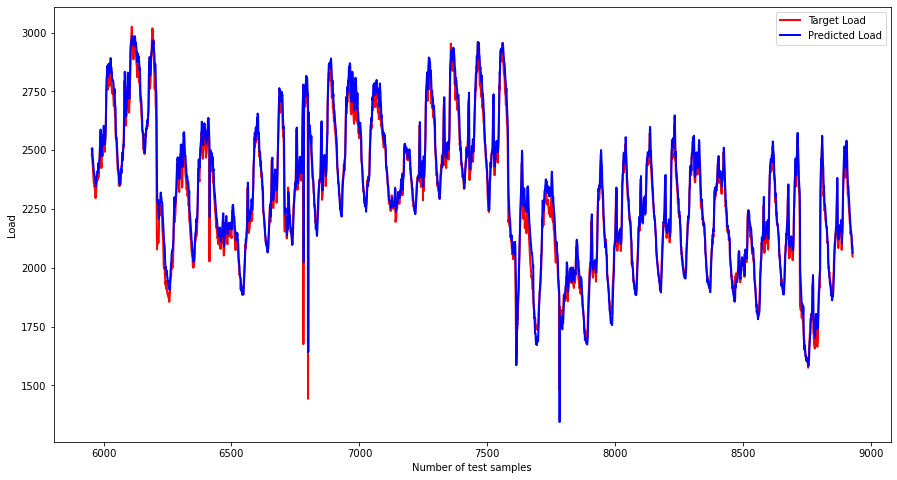

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.7241620173284555


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.979461
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5954  247802.011707
5955  249603.416399
5956  246000.838630
5957  244901.264425
5958  243400.890355
...             ...
8923  211295.921754
8924  208094.798458
8925  208596.283493
8926  204693.700708
8927  204695.073037

[2974 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5954   682.457420
5955     1.448662
5956  2242.444128
5957  1035.460205
5958  1221.358207
...           ...
8923   452.017606
8924  1097.053626
8925    15.713111
8926  1879.470406
8927   232.505253

[2974 rows x 1 columns]
y_t+1    4007.004584
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    63.300905
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[2505.1545]
[2495.83]
[2508.382]
[2482.2043]
[2469.9712]
[2457.1982]
[2444.1301]
[2428.2842]
[2411.3354]
[2397.3582]
[2399.9495]
[2388.4275]
[2386.755]
[2380.3813]
[2371.4949]
[2351.6167]
[2345.283]
[2355.7708]
[2365.527]
[2373.9]
[2387.9272]
[2394.249]
[2410.8066]
[2409.0632]
[2405.9648]
[2430.1323]
[2445.6646]
[2421.6025]
[2432.6316]
[2441.9385]
[2457.3228]
[2469.569]
[2502.3064]
[2546.1714]
[2584.7598]
[2587.9119]
[2510.1597]
[2483.599]
[2492.2952]
[2476.5044]
[2506.0425]
[2559.001]
[2551.4656]
[2518.5742]
[2548.363]
[2565.96]
[2564.1416]
[2603.5679]
[2545.4053]
[2546.6006]
[2531.1538]
[2529.1455]
[2525.2532]
[2556.7786]
[2571.2693]
[2596.1697]
[2684.8872]
[2740.062]
[2809.0818]
[2814.3477]
[2842.452]
[2859.0713]
[2845.4326]
[2826.4575]
[2814.081]
[2832.6965]
[2867.2507]
[2844.6836]
[2833.6772]
[2841.2732]
[2828.735]
[2841.1516]
[2862.3813]
[2875.9844]
[2891.6794]
[2858.3237]
[2853.2053]
[2851.19]
[2837.0413]
[2829.3677]
[2798.416]
[2795.175]
[2798.6643]
[2794.5872]
[2792.2847]
[278

[2623.6794]
[2592.7883]
[2599.6973]
[2575.361]
[2466.316]
[2322.641]
[2263.2031]
[2244.4224]
[2231.415]
[2254.0552]
[2219.6675]
[2212.1997]
[2208.3286]
[2198.7925]
[2177.339]
[2137.0686]
[2154.7178]
[2195.835]
[2167.39]
[2180.4136]
[2322.812]
[2312.0098]
[2302.5732]
[2277.1008]
[2245.0195]
[2205.9985]
[2222.6233]
[2205.3657]
[2183.2603]
[2167.7478]
[2162.3098]
[2168.1255]
[2141.5498]
[2138.3489]
[2125.3135]
[2114.0999]
[2098.0845]
[2122.5667]
[2141.4297]
[2170.7666]
[2208.7808]
[2246.826]
[2268.5059]
[2281.3171]
[2304.4624]
[2323.05]
[2342.6953]
[2342.4397]
[2363.3652]
[2340.7021]
[2396.852]
[2455.519]
[2550.8105]
[2596.152]
[2581.2852]
[2475.8022]
[2382.3486]
[2366.9653]
[2358.9917]
[2382.564]
[2381.51]
[2397.1604]
[2421.1355]
[2434.515]
[2460.5845]
[2471.6226]
[2471.1443]
[2472.2876]
[2455.6191]
[2451.921]
[2438.2466]
[2402.035]
[2415.0845]
[2453.5566]
[2471.7786]
[2535.9492]
[2640.436]
[2695.1672]
[2768.461]
[2778.9358]
[2023.3481]
[2386.95]
[2768.1243]
[2750.337]
[2768.3843]
[2761.

[2500.3953]
[2478.5552]
[2458.9407]
[2459.2002]
[2435.851]
[2421.7927]
[2409.755]
[2374.379]
[2365.8643]
[2314.6323]
[2301.832]
[2276.1504]
[2255.4448]
[2254.0066]
[2244.8667]
[2271.3943]
[2321.8625]
[2367.253]
[2373.9214]
[2415.7434]
[2442.5513]
[2428.0867]
[2452.7493]
[2483.0183]
[2484.443]
[2493.778]
[2498.615]
[2494.9802]
[2537.6343]
[2617.2686]
[2707.622]
[2737.6152]
[2585.618]
[2466.7354]
[2461.6948]
[2456.4937]
[2430.9067]
[2467.6477]
[2460.5657]
[2498.367]
[2501.3506]
[2526.5962]
[2536.2212]
[2539.2913]
[2530.2356]
[2524.2607]
[2508.691]
[2530.4224]
[2491.8198]
[2512.5518]
[2548.6213]
[2561.8633]
[2649.8682]
[2711.359]
[2777.4478]
[2833.8816]
[2822.3315]
[2887.3154]
[2910.3608]
[2922.7754]
[2927.2458]
[2925.5142]
[2933.0557]
[2919.4346]
[2919.2227]
[2929.7188]
[2926.1938]
[2955.8882]
[2947.1892]
[2929.7632]
[2913.2085]
[2895.7798]
[2879.1467]
[2872.9849]
[2866.1514]
[2856.3184]
[2826.4377]
[2809.822]
[2794.0054]
[2783.9116]
[2746.5405]
[2763.321]
[2732.8062]
[2703.3027]
[2665.6

[2229.465]
[2233.1965]
[2283.1218]
[2341.0076]
[2390.6309]
[2394.8284]
[2281.0122]
[2191.616]
[2184.273]
[2167.3625]
[2148.241]
[2153.705]
[2161.7014]
[2165.698]
[2161.0278]
[2172.0764]
[2180.438]
[2180.7888]
[2205.3584]
[2194.0508]
[2169.4985]
[2156.8997]
[2131.1948]
[2152.4258]
[2149.9172]
[2189.7458]
[2287.5217]
[2369.4495]
[2461.9595]
[2513.3218]
[2543.4316]
[2541.2043]
[2530.3787]
[2511.1763]
[2524.4285]
[2552.5513]
[2538.6284]
[2548.2227]
[2542.9795]
[2586.475]
[2643.1482]
[2648.208]
[2589.0632]
[2539.9436]
[2476.5518]
[2492.473]
[2430.9873]
[2410.9414]
[2407.6152]
[2389.4797]
[2371.905]
[2353.2358]
[2348.2197]
[2325.4739]
[2290.0361]
[2295.5366]
[2285.7483]
[2234.6304]
[2233.353]
[2239.2039]
[2213.0127]
[2217.3435]
[2186.6392]
[2173.713]
[2154.0808]
[2100.7026]
[2074.9583]
[2058.8518]
[2053.3733]
[2033.38]
[2039.1493]
[2016.0704]
[2004.2146]
[2003.1356]
[1994.5836]
[1982.9094]
[1969.3474]
[1971.0393]
[1963.4408]
[1956.9586]
[1959.183]
[1964.4287]
[1953.7195]
[1955.805]
[1970.225